In [1]:
%pip install gym


  Created wheel for gym: filename=gym-0.17.2-py3-none-any.whl size=1650896 sha256=3d2cf7ff34da509d46501602995e8d37e5eac5d3c7ceaca2d3207d1be6c61a4c
  Stored in directory: c:\users\acebr\appdata\local\pip\cache\wheels\18\e1\58\89a2aa24e6c2cc800204fc02010612afdf200926c4d6bfe315
Successfully built gym


You should consider upgrading via the 'c:\users\acebr\desktop\keras-playground\torch-playground\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import gym
import random
import math
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import deque
import matplotlib.pyplot as plt

In [3]:
EPISODES = 50
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
GAMMA = 0.8
LR = 0.001
BATCH_SIZE = 64

In [12]:
class DQNAgent:
    def __init__(self):
        self.model = nn.Sequential(
            nn.Linear(4, 256),
            nn.ReLU(),
            nn.Linear(256, 2),
        )
        
        self.optimizer = optim.Adam(self.model.parameters(), LR)
        self.steps_done = 0
        self.memory = deque(maxlen=10000)
    
    def memorize(self, state, action, reward, next_state):
        self.memory.append((state,
                           action,
                           torch.FloatTensor([reward]),
                           torch.FloatTensor([next_state])))
        
    def act(self, state):
        eps_threshold = EPS_END + (EPS_START - EPS_END) *\
                        math.exp(-1. * self.steps_done / EPS_DECAY)
        self.steps_done += 1
        if random.random() > eps_threshold:
            return self.model(state).data.max(1)[1].view(1, 1)
        else:
            return torch.LongTensor([[random.randrange(2)]])
    
    def learn(self):
        if len(self.memory) < BATCH_SIZE:
            return
        batch = random.sample(self.memory, BATCH_SIZE)
        states, actions, rewards, next_states = zip(*batch)
        
        states = torch.cat(states)
        actions = torch.cat(actions)
        rewards = torch.cat(rewards)
        next_states = torch.cat(next_states)
        
        current_q = self.model(states).gather(1, actions)
        max_next_q = self.model(next_states).detach().max(1)[0]
        expected_q = rewards + (GAMMA * max_next_q)
        
        loss = F.mse_loss(current_q.squeeze(), expected_q)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

In [14]:
env = gym.make("CartPole-v0")
agent = DQNAgent()
score_history = []

for e in range(1, EPISODES+1):
    state = env.reset()
    steps = 0
    while True:
        env.render()
        state = torch.FloatTensor([state])
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action.item())
        
        if done:
            reward = -1
        
        agent.memorize(state, action, reward, next_state)
        agent.learn()
        
        state = next_state
        agent.learn()
        
        state = next_state
        steps += 1
        
        if done:
            print(f"Episode: {e}, Score: {steps}")
            score_history.append(steps)
            break

Episode: 1, Score: 14


Exception ignored in: <function Viewer.__del__ at 0x0000022E7A2C55E8>
Traceback (most recent call last):
  File "c:\users\acebr\desktop\keras-playground\torch-playground\venv\lib\site-packages\gym\envs\classic_control\rendering.py", line 162, in __del__
    self.close()
  File "c:\users\acebr\desktop\keras-playground\torch-playground\venv\lib\site-packages\gym\envs\classic_control\rendering.py", line 81, in close
    self.window.close()
  File "c:\users\acebr\desktop\keras-playground\torch-playground\venv\lib\site-packages\pyglet\window\win32\__init__.py", line 299, in close
    super(Win32Window, self).close()
  File "c:\users\acebr\desktop\keras-playground\torch-playground\venv\lib\site-packages\pyglet\window\__init__.py", line 823, in close
    app.windows.remove(self)
  File "c:\python37\lib\_weakrefset.py", line 109, in remove
    self.data.remove(ref(item))
KeyError: (<weakref at 0x0000022E7EE88688; to 'Win32Window' at 0x0000022E79013088>,)
Exception ignored in: <function Viewer.

Episode: 2, Score: 17
Episode: 3, Score: 14
Episode: 4, Score: 11
Episode: 5, Score: 13
Episode: 6, Score: 34
Episode: 7, Score: 12
Episode: 8, Score: 17
Episode: 9, Score: 21
Episode: 10, Score: 12
Episode: 11, Score: 16
Episode: 12, Score: 18
Episode: 13, Score: 29
Episode: 14, Score: 32
Episode: 15, Score: 17
Episode: 16, Score: 53
Episode: 17, Score: 43
Episode: 18, Score: 40
Episode: 19, Score: 28
Episode: 20, Score: 31
Episode: 21, Score: 47
Episode: 22, Score: 31
Episode: 23, Score: 53
Episode: 24, Score: 54
Episode: 25, Score: 40
Episode: 26, Score: 50
Episode: 27, Score: 54
Episode: 28, Score: 62
Episode: 29, Score: 43
Episode: 30, Score: 107
Episode: 31, Score: 66
Episode: 32, Score: 58
Episode: 33, Score: 75
Episode: 34, Score: 184
Episode: 35, Score: 200
Episode: 36, Score: 200
Episode: 37, Score: 128
Episode: 38, Score: 200
Episode: 39, Score: 175
Episode: 40, Score: 200
Episode: 41, Score: 200
Episode: 42, Score: 200
Episode: 43, Score: 200
Episode: 44, Score: 177
Episode

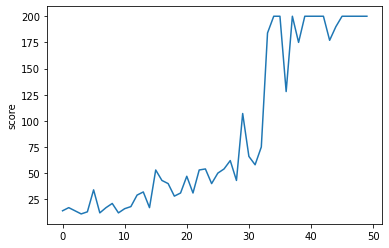

In [16]:
plt.plot(score_history)
plt.ylabel('score')
plt.show()